# Define the model

In [1]:
import tensorflow as tf
import numpy as np
from parana.Model import Model
from parana.Layers import fc_layer
from parana.Layers import softmax_layer
from parana.optimizer import optimizer
from parana.optimizer import adamopt
from parana.parameter_saver import saver
import matplotlib.pyplot as plt
import pickle
from parana.parameter_pruning import lobotomizer
from parana.layer_wiggles import get_mean_activations
from parana.wiggles import get_absolute_values
from parana.parameter_selection import get_k_smallest
from parana.parameter_selection import get_k_max

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

path = 'path'

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

# Tensorflow noise varables and operations,
# noise is added at the input of layer 1
noise = tf.Variable(tf.zeros([784]), name='x_noise')
set_zero_noise = tf.assign(noise, tf.zeros([784]))
noise_placeholder = tf.placeholder('float', [784], name = 'noise_placeholder')
assign_noise = tf.assign(noise, noise_placeholder)

class this_model(Model):
    
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels
        self.cost_function = 'cross_entropy_l2'
        self.relu_logit_cost_function = 'quadratic_l2'
        self.logit_cost_function = 'quadratic_l2'
        self.dropout = 0.5
        self.layer1 = fc_layer(inputs=inputs + noise,
                               weight_init = 'xavier',
                               size=1500,
                               weight_decay=0.0001, bias_decay=0.0001)
        self.layer2 = fc_layer(inputs=self.layer1.activate, 
                               weight_init = 'xavier',
                               size=800, 
                               weight_decay=0.0001, bias_decay=0.0001)
        self.layer3 = fc_layer(inputs=self.layer2.activate, 
                               weight_init = 'xavier',
                               size=400, 
                               weight_decay=0.0001, bias_decay=0.0001)
        self.layersoftmax = softmax_layer(inputs=self.layer3.activate, 
                                          size=10, 
                                          weight_decay=0.0001, bias_decay=0.0001)
        self.layers = [self.layer1, self.layer2, self.layer3, self.layersoftmax]
    
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

mymodel = this_model(X, y)

sess = tf.Session()
# Optimizer for training network
opt = adamopt(sess, 0.00001, mymodel.relu_logit_cost, model =  mymodel)

sess.run(tf.global_variables_initializer())

model_saver = saver(mymodel, sess)

C:\Users\Jim\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Training loop

In [2]:
for i in range(100000):
    batch = mnist.train.next_batch(250)
    opt.min_step(data = {X:batch[0], y:batch[1]})
model_saver.store_parameters()
print ('Finish')
print(mymodel.accuracy(sess,inputs =  mnist.test.images, labels =  mnist.test.labels))
#model_saver.pickle_parameters('{}test1.p'.format(path))


InternalError: Blas GEMM launch failed : a.shape=(250, 784), b.shape=(784, 1500), m=250, n=1500, k=784
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](add, Mul)]]

Caused by op 'MatMul', defined at:
  File "C:\Users\Jim\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Jim\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Jim\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Jim\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Jim\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Jim\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Jim\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Jim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-34301d62ebb2>", line 61, in <module>
    mymodel = this_model(X, y)
  File "<ipython-input-1-34301d62ebb2>", line 44, in __init__
    weight_decay=0.0001, bias_decay=0.0001)
  File "C:\Users\Jim\TensorflowTrials\parana\Layers.py", line 35, in __init__
    self._activate = tf.nn.relu(tf.matmul(self._inputs, tf.multiply(self._weights, self._dropout_mask)) + self._biases)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1891, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 2436, in _mat_mul
    name=name)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\Users\Jim\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(250, 784), b.shape=(784, 1500), m=250, n=1500, k=784
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](add, Mul)]]


# Or load an existing model

In [2]:
model_saver.load_parameters('model.p'.format(path))
model_saver.store_parameters()
print(mymodel.accuracy(sess,inputs =  mnist.test.images, labels =  mnist.test.labels))

Parameters loaded from  c:/users/jim/tensorflowtrials/ANN_ReLu-Quadratic.p
0.9865


# Test Function
This is a loop that tests the accuracy with different noise vectors added, progressively removing more parameters.

In [3]:
model_saver.restore_parameters()
path = 'path'
file_list = ['{}adv_class_3_limit_0.25.p', '{}adv_class_2_limit_0.25.p',
             '{}adv_class_1_limit_0.15.p', '{}adv_class_5_limit_0.15.p',
             '{}adv_class_5_limit_0.35.p', '{}adv_class_8_limit_0.2.p',
             '{}adv_class_7_limit_0.3.p', '{}adv_class_9_limit_0.2.p']


def test_function(prune_step, start_ratio, step_size, steps, file_list):
    accuracies = [[] for i in range(len(file_list)+1)]
    prune_ratio = start_ratio
    #Get accuracies without noise first
    for i in range(steps):
        this_accuracy = mymodel.accuracy(sess, inputs =  mnist.test.images, labels =  mnist.test.labels)
        accuracies[0].append(this_accuracy)
        for i in enumerate(file_list):
            noisevector = pickle.load(open(i[1].format(path), 'rb'))
            noisevector = np.reshape(noisevector, -1)
            sess.run(assign_noise, {noise_placeholder: noisevector})
            accuracies[i[0]+1].append(mymodel.accuracy(sess, inputs =  mnist.test.images, labels =  mnist.test.labels))
        prune_step(prune_ratio)
        prune_ratio = prune_ratio + step_size
        sess.run(set_zero_noise)
    model_saver.restore_parameters()
    return accuracies

## Come on use the noise

## Absolute Values

This uses the absolute value of the weights of the model.

In [4]:
absvalues = lobotomizer(session = sess,
                          model = mymodel,
                          parameters_list = mymodel.get_weights,
                          wigglyness = get_absolute_values,
                          parameter_selection = get_k_smallest,
                          cost = mymodel.cost,
                          data_function = mnist.train.next_batch,
                          X = X, y = y)

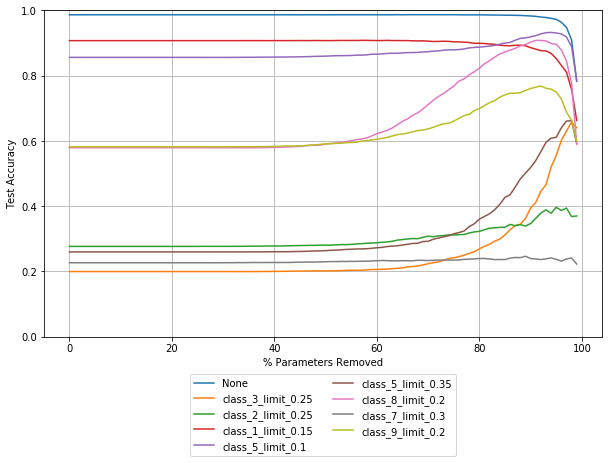

In [8]:
model_saver.restore_parameters()
abs_accuracy_bigstep = test_function(absvalues.prune_step, start_ratio = 0, step_size = 0.01, steps = 100, file_list = file_list)

label_list = ['None', 'class_3_limit_0.25', 'class_2_limit_0.25',
             'class_1_limit_0.15', 'class_5_limit_0.1',
             'class_5_limit_0.35', 'class_8_limit_0.2',
             'class_7_limit_0.3', 'class_9_limit_0.2']
for i in range(len(abs_accuracy_bigstep)):
    plt.plot(abs_accuracy_bigstep[i], label = label_list[i])
plt.legend()
plt.grid()
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.ylim(0,1)
plt.xlabel('% Parameters Removed')
plt.ylabel('Test Accuracy')
plt.show()

## Mean Activation Values

This module prunes parameters based on their mean value when multiplied by input vectors.


In [6]:
activationvalues = lobotomizer(session = sess,
                               model = mymodel,
                               layers_list = mymodel.layers,
                               parameters_list = mymodel.get_weights,
                               wigglyness = get_mean_activations,
                               parameter_selection = get_k_smallest,
                               cost = mymodel.cost,
                               data_function = mnist.train.next_batch,
                               X = X, y = y,
                               batch_size = 200)
activationvalues.get_wigglyness(iterations = 2000)
print('gotit')

gotit


In [7]:
model_saver.restore_parameters()
activationvalues.prune_step(0.82)
print(mymodel.accuracy(sess,inputs =  mnist.test.images, labels =  mnist.test.labels))

0.9737


In [7]:
model_saver.store_parameters()
model_saver.pickle_parameters('model_pruned.p'.format(path))

pickled


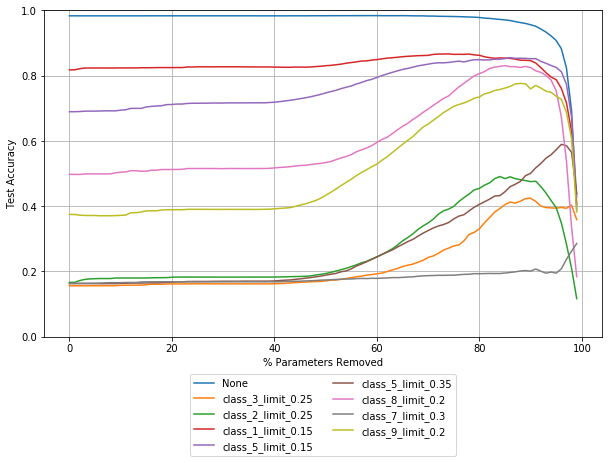

In [8]:
label_list = ['None', 'class_3_limit_0.25', 'class_2_limit_0.25',
             'class_1_limit_0.15', 'class_5_limit_0.15',
             'class_5_limit_0.35', 'class_8_limit_0.2',
             'class_7_limit_0.3', 'class_9_limit_0.2']
model_saver.restore_parameters()
act_accuracy_bigstep = test_function(activationvalues.prune_step, start_ratio = 0, step_size = 0.01, steps = 100, file_list = file_list)
for i in range(len(act_accuracy_bigstep)):
    plt.plot(act_accuracy_bigstep[i], label = label_list[i])
plt.legend()
plt.grid()
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xlabel('% Parameters Removed')
plt.ylabel('Test Accuracy')
plt.ylim(0,1)
plt.show()

# Try combining them

This prunes based both selection criteria. As seen above, overall performance drops off sooner using mean activation values, so the ratio of parameters removed based on this method is reduced by 15%. 

In [8]:
model_saver.restore_parameters()

def combination_prune(prune_ratio):
    acti_prune_ratio = prune_ratio - 0.07
    if acti_prune_ratio < 0:
        acti_prune_ratio = 0
    activationvalues.prune_step(acti_prune_ratio)
    absvalues.prune_step(prune_ratio)
    return

combination_accuracy = test_function(combination_prune, start_ratio = 0, step_size = 0.01, steps = 100, file_list = file_list)
for i in range(len(combination_accuracy)):
    plt.plot(combination_accuracy[i], label = label_list[i])
plt.legend()
plt.grid()
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xlabel('% Parameters Removed')
plt.ylabel('Test Accuracy')
plt.ylim(0,1)
plt.show()

NameError: name 'combination_accuracy' is not defined

# Make tables
Everything below here is where I have tried to make nice looking tables for my blogs, nothing new or very interesting


In [6]:

def print_accuracies():
    accuracies = []
    sess.run(set_zero_noise)
    accuracies.append(mymodel.accuracy(sess, inputs =  mnist.test.images, labels =  mnist.test.labels))
    for i in enumerate(file_list):
                noisevector = pickle.load(open(i[1].format(path), 'rb'))
                sess.run(assign_noise, {noise_placeholder: noisevector})
                accuracies.append(mymodel.accuracy(sess, inputs =  mnist.test.images, labels =  mnist.test.labels))
    return accuracies

In [12]:
import pandas as pd

model_saver.restore_parameters()
nopruning = np.array(['No Pruning'])
nopruning = np.append(nopruning, print_accuracies())

absvalues.prune_step(0.9)
absolutevalues = np.array(['Absolute Values'])
absolutevalues = np.append(absolutevalues, print_accuracies())
model_saver.restore_parameters()

activationvalues.prune_step(0.81)
activalues = np.array(['Activation Values'])
activalues = np.append(activalues, print_accuracies())
model_saver.restore_parameters()

absvalues.prune_step(0.85)
activationvalues.prune_step(0.8)
combiprune = (['Combined Prune'])
combiprune = np.append(combiprune, print_accuracies())

all_performances = np.concatenate([[nopruning, absolutevalues, activalues, combiprune]])
all_performances = pd.DataFrame(all_performances)
all_performances.style

,0,1,2,3,4,5,6,7,8,9
0,No Pruning,0.9865,0.1993,0.2764,0.9073,0.959,0.2595,0.579,0.2263,0.5818
1,Absolute Values,0.9818,0.411,0.3624,0.8814,0.9686,0.5395,0.9081,0.2379,0.7646
2,Activation Values,0.9814,0.4868,0.5708,0.9163,0.9669,0.5732,0.9156,0.2969,0.7841
3,Combined Prune,0.9801,0.5111,0.5035,0.8971,0.9657,0.5809,0.9241,0.2862,0.8017


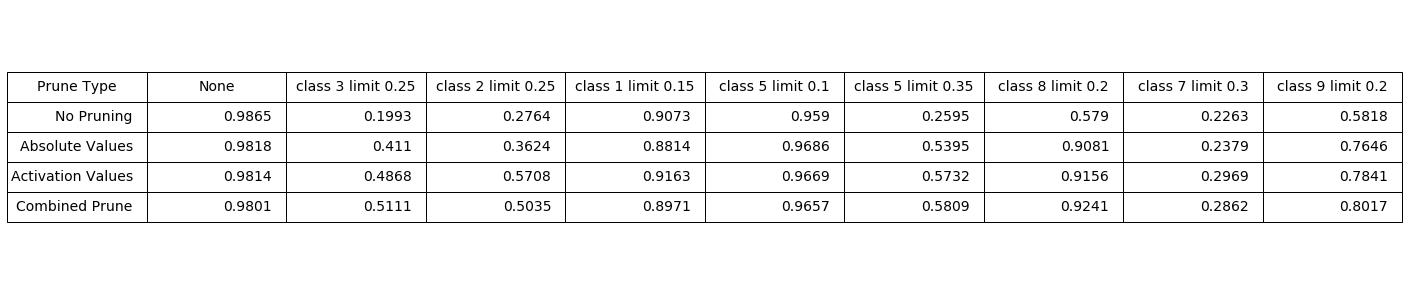

In [13]:
import matplotlib.pyplot as plt

label_list = ['Prune Type','None', 'class 3 limit 0.25', 'class 2 limit 0.25',
             'class 1 limit 0.15', 'class 5 limit 0.1',
             'class 5 limit 0.35', 'class 8 limit 0.2',
             'class 7 limit 0.3', 'class 9 limit 0.2']

fig = plt.figure(figsize=(10,5))

table = plt.table(cellText = all_performances.values,
                  colLabels = label_list,
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2.5, 2.5)
plt.axis('off')
plt.grid('off')

#plt.savefig(__file__+'test2.png', bbox_inches="tight" )
plt.show()